In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from smart_open import smart_open

In [2]:
#------------------------- PARSER -------------------------#

rx_dict = {
  'map' : re.compile(r'^map\s+(?P<topic>\d+)\s+(?P<value>.*)\n'),
  'Rprec': re.compile(r'^Rprec\s+(?P<topic>\d+)\s+(?P<value>.*)\n'),
  'p10' : re.compile(r'^P_10\s+(?P<topic>\d+)\s+(?P<value>.*)\n')
}

def _parse_line(line):
  for key, rx in rx_dict.items():
    match = rx.search(line)
    if match:
      #print(line)
      return key, match
  return None, None

def parse_file(filepath):
  data = []
  with smart_open(filepath, 'r') as file_object:
    record = {}
    for line in file_object:
      key, match = _parse_line(line) 
      if match is None:
        continue
      topic = int(match.group('topic'))
      if bool(record.get('topic')) and record.get('topic') != topic:
        data.append(record.copy()) 
      record['topic'] = topic
      value = float(match.group('value'))
      if key == 'map':
        record['AP'] = value
      elif key == 'Rprec':
        record['Rprec'] = value
      elif key == 'p10':
        record['p10'] = value
    if bool(record): data.append(record.copy())
    data = pd.DataFrame(data, columns=['topic', 'AP', 'Rprec', 'p10'])
    data.set_index('topic')
    return data



In [3]:
# Qui parso i file ottenuti con trec_eval per ottenere le tre misure principali richieste per l'ANOVA (AP,Rprec,P10)

bm251 = parse_file('/Users/Francescomandru/Desktop/Risultati2/BM25 PS & SL/BM25_1.txt')
bm252 = parse_file('/Users/Francescomandru/Desktop/Risultati2/BM25 PS & NSL/BM25_2.txt')
tfidf0 = parse_file('/Users/Francescomandru/Desktop/Risultati2/TF_IDF PS & SL/TF_IDF_0.txt')
tfidf3 = parse_file('/Users/Francescomandru/Desktop/Risultati2/TF_IDF NPS & NSL/TF_IDF_3.txt')

# Mi ricavo i vettori per metlab per il test ANOVA 
print("\n Vettori per Average Precision: \n")

print(list(bm251['AP']))  
print(list(bm252['AP']))  
print(list(tfidf0['AP'])) 
print(list(tfidf3['AP'])) 

print("\n Vettori per Rprec: \n")

print(list(bm251['Rprec']))  
print(list(bm252['Rprec']))  
print(list(tfidf0['Rprec'])) 
print(list(tfidf3['Rprec'])) 

print("\n Vettori per precision at 10: \n")

print(list(bm251['p10']))  
print(list(bm252['p10']))  
print(list(tfidf0['p10'])) 
print(list(tfidf3['p10'])) 



 Vettori per Average Precision: 

[0.5229, 0.0237, 0.2362, 0.1677, 0.1332, 0.0106, 0.2956, 0.2997, 0.0462, 0.2238, 0.3065, 0.1122, 0.0454, 0.5543, 0.715, 0.344, 0.1248, 0.4079, 0.2746, 0.1254, 0.0574, 0.2488, 0.3859, 0.2389, 0.2589, 0.0052, 0.2968, 0.0401, 0.0725, 0.1695, 0.0569, 0.6056, 0.0257, 0.238, 0.2177, 0.0223, 0.1382, 0.2662, 0.0145, 0.2022, 0.2668, 0.4335, 0.0479, 0.0235, 0.129, 0.288, 0.3125, 0.0975, 0.08, 0.4169]
[0.3805, 0.0, 0.2238, 0.008, 0.0716, 0.006, 0.0, 0.2865, 0.0325, 0.1742, 0.2827, 0.0858, 0.0546, 0.5145, 0.6599, 0.1596, 0.0498, 0.3362, 0.1608, 0.0001, 0.0141, 0.1843, 0.005, 0.1847, 0.0817, 0.0004, 0.1814, 0.0, 0.0514, 0.1467, 0.036, 0.0345, 0.0215, 0.0002, 0.1614, 0.0133, 0.1174, 0.2232, 0.0134, 0.1628, 0.0, 0.0165, 0.0271, 0.0025, 0.0065, 0.2988, 0.329, 0.0062, 0.0591, 0.3582]
[0.5191, 0.0225, 0.233, 0.1549, 0.1309, 0.0107, 0.3028, 0.3001, 0.0533, 0.2184, 0.3073, 0.1129, 0.0447, 0.5528, 0.7204, 0.3193, 0.1184, 0.4067, 0.2761, 0.119, 0.0569, 0.2499, 0.3874, 0.23


 SL e NSL sta per Stop List e Non Stop List 


 PS e NPS sta per Porter Stemmer e Non Porter Stemmer 



[Text(0,0.5,'Average Precision')]

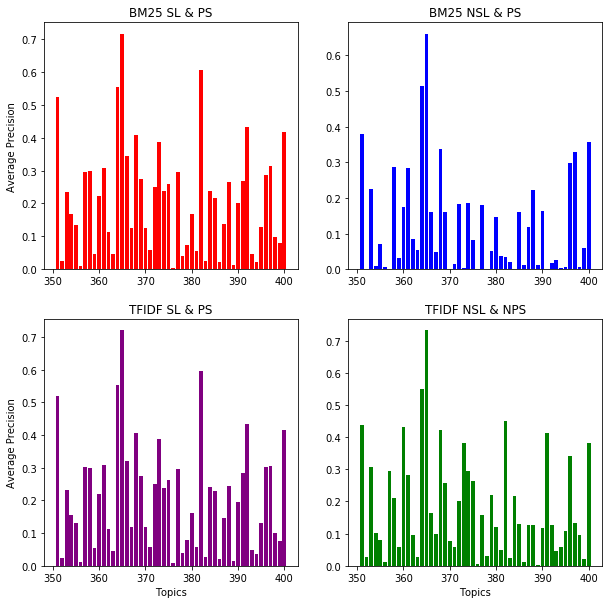

In [4]:
print("\n SL e NSL sta per Stop List e Non Stop List \n")
print("\n PS e NPS sta per Porter Stemmer e Non Porter Stemmer \n")
f, axarr = plt.subplots(2, 2,figsize=(10,10))
axarr[0, 0].bar(bm251['topic'],bm251['AP'], label="AP BM251",color="red")
axarr[0, 0].set_title('BM25 SL & PS')
axarr[0, 1].bar(bm252['topic'],bm252['AP'], label="AP BM252",color="blue")
axarr[0, 1].set_title('BM25 NSL & PS')
axarr[1, 0].bar(tfidf0['topic'],tfidf0['AP'], label="AP TFIDF0",color="purple")
axarr[1, 0].set_title('TFIDF SL & PS')
axarr[1, 1].bar(tfidf3['topic'],tfidf3['AP'], label="AP TFIDF3",color="green")
axarr[1, 1].set_title('TFIDF NSL & NPS')


axarr[1,0].set(xlabel='Topics', ylabel='Average Precision')
axarr[1,1].set(xlabel='Topics')
axarr[0,0].set(ylabel='Average Precision')


 SL e NSL sta per Stop List e Non Stop List 


 PS e NPS sta per Porter Stemmer e Non Porter Stemmer 



[Text(0,0.5,'Rprec')]

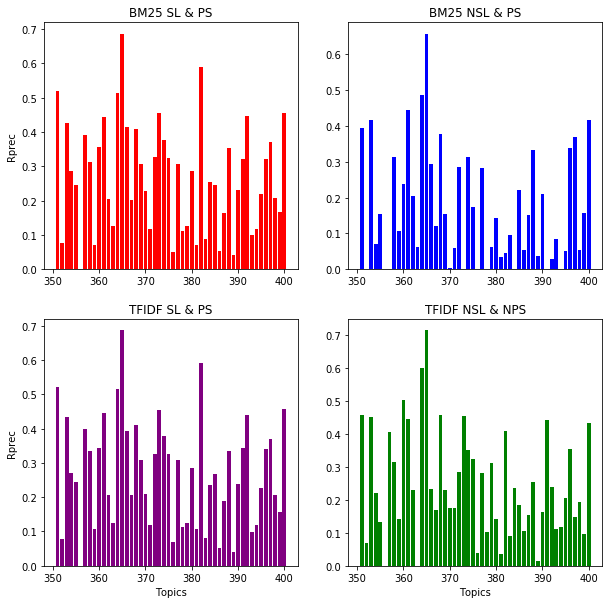

In [5]:
print("\n SL e NSL sta per Stop List e Non Stop List \n")
print("\n PS e NPS sta per Porter Stemmer e Non Porter Stemmer \n")
f, axarr = plt.subplots(2, 2,figsize=(10,10))
axarr[0, 0].bar(bm251['topic'],bm251['Rprec'], label="Rprec BM251",color="red")
axarr[0, 0].set_title('BM25 SL & PS')
axarr[0, 1].bar(bm252['topic'],bm252['Rprec'], label="Rprec BM252",color="blue")
axarr[0, 1].set_title('BM25 NSL & PS')
axarr[1, 0].bar(tfidf0['topic'],tfidf0['Rprec'], label="Rprec TFIDF0",color="purple")
axarr[1, 0].set_title('TFIDF SL & PS')
axarr[1, 1].bar(tfidf3['topic'],tfidf3['Rprec'], label="Rprec TFIDF3",color="green")
axarr[1, 1].set_title('TFIDF NSL & NPS')


axarr[1,0].set(xlabel='Topics', ylabel='Rprec')
axarr[1,1].set(xlabel='Topics')
axarr[0,0].set(ylabel='Rprec')


 SL e NSL sta per Stop List e Non Stop List 


 PS e NPS sta per Porter Stemmer e Non Porter Stemmer 



[Text(0,0.5,'Precison at 10')]

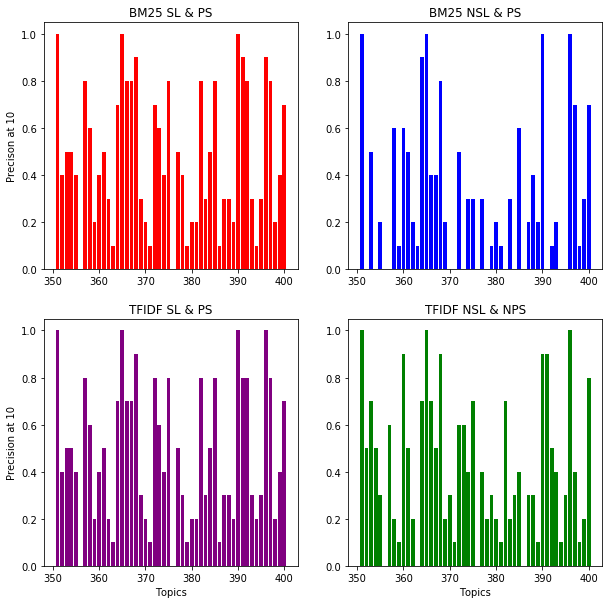

In [6]:
print("\n SL e NSL sta per Stop List e Non Stop List \n")
print("\n PS e NPS sta per Porter Stemmer e Non Porter Stemmer \n")
f, axarr = plt.subplots(2, 2,figsize=(10,10))
axarr[0, 0].bar(bm251['topic'],bm251['p10'], label="p10 BM251",color="red")
axarr[0, 0].set_title('BM25 SL & PS')
axarr[0, 1].bar(bm252['topic'],bm252['p10'], label="p10 BM252",color="blue")
axarr[0, 1].set_title('BM25 NSL & PS')
axarr[1, 0].bar(tfidf0['topic'],tfidf0['p10'], label="p10 TFIDF0",color="purple")
axarr[1, 0].set_title('TFIDF SL & PS')
axarr[1, 1].bar(tfidf3['topic'],tfidf3['p10'], label="p10 TFIDF3",color="green")
axarr[1, 1].set_title('TFIDF NSL & NPS')


axarr[1,0].set(xlabel='Topics', ylabel='Precision at 10')
axarr[1,1].set(xlabel='Topics')
axarr[0,0].set(ylabel='Precison at 10')